<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Lecture 11 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 17 November 2020, with material from Peter Norvig and Chris Fonnesbeck</div>

# Review: Bayesian Statistical Analysis

***Bayesian*** statistics is not just a particular statistical method. It is a *completely different, modern, and very successful paradigm* for doing statistical analysis. It is different from ***frequentist*** statistics, and this is what we'll investigate and contrast in this notebook.

A Bayesian model is described by ***parameters*** and ***uncertainty*** in those parameters. The model is described as ***probability distributions***, which we had time to experiment with. Uncertainly in its parameters is *also* described as probability distributions. That is why you need a solid foundation in probability theory in data science.

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

## 1. Probability Distributions

Let $Z$ be a random variable. Associated with $Z$ is a **probability distribution function** (pdf) that assigns probabilities to the different outcomes $Z$ can take. Graphically, a probability distribution is a curve where the probability of an outcome on the x-axis is the value of the curve on the y-axis.

We can divide random variables into three categories:

-   **$Z$ is discrete**: Discrete random variables are ***categorical***: They may only assume values on a specified list. In R, we call these values `factors`. Might as well call them `factors` in python. Movie ratings are an example of a discrete random variables. 


-   **$Z$ is continuous**: Continuous random variable can take on ***arbitrarily exact values***. For example, temperature, speed, time, color are all modeled as continuous variables because you can progressively make the values more and more precise.


- **$Z$ is mixed**: Mixed random variables assign probabilities to both discrete and continuous random variables, i.e. it is a combination of the above two categories. 

### Discrete Case
If $Z$ is discrete, then its distribution is called a ***probability mass function*** (pmf), which measures the probability $Z$ takes on the value $k$, denoted $P(Z=k)$. Note that the probability mass function completely describes the random variable $Z$, that is, if we know the mass function, we know how $Z$ should behave. 

In the discrete case, we turn to python ***dictionaries***. In the continuous case, we use modeling functions from python libraries like `SciPy`.

##  Expectation of a random variable

In probability theory, the *expectation*, or *expected value* of a random variable is what the frequentists would denote.. the ***long-run average value of repetitions of the experiment*** it represents. For example, the expected value in rolling a six-sided die is 3.5, because the average of all the numbers that come up in an extremely large number of rolls is close to 3.5 (why isn't it 3?).

<br />
<center>
    <img src="ipynb.images/average3.5.png" width=400 />
</center>


<div style="display:none;">
Probability explanation:
$$(1 * \frac 16) + (2 * \frac 16) + (3 * \frac16) + (4 * \frac16) + (5 * \frac16) + (6 * \frac16)$$
</div>

The mathematical definition of **Expectation** is the following: ***The expected value of a discrete random variable is the probability-weighted average of all possible values***. In other words, each possible value the random variable can assume is multiplied by its probability of occurring, and the resulting products are summed to produce the expected value. So, for Formula 1 drivers, the Expectation of a Mercedes win is the sum of the probability of a Lewis Hamilton win and the probability of a Vaitteri Bottas win (sometimes divided by two).

The same principle applies to a continuous random variable, except that the **sum** is replaced with the **integral of the variable with respect to its probability density**.

The expected value is a *key* aspect of how one characterizes a probability distribution; it is one type of *location* parameter. By contrast, the **variance**, another *key* value, is a measure of *dispersion* of the possible values of the random variable around the expected value. 

## Statistical Inference

**Statistical inference** is the process of learning from incomplete or error-contaminated data. We account for this incompleteness and imperfection using either a sampling model with incomplete samples or errors in measurement.

Any statistical inference paradigm, Bayesian or otherwise, involves at least the following: 

1. Some **unknown quantities** about which we are interested in learning or testing. We call these *parameters*. These are also called **dependent variables**.
2. Some **data** which have been observed, and hopefully contain information about the parameters. These are called the **independent variables**.
3. One or more **models** that relate the data to the dependent parameters. The model is the ***instrument used to learn***.

### Bayesian World View

- Data is considered **fixed**. It used to be random, but once stored in your lab notebook or spreadsheet, it does not change.


- Model parameters may not be random, but Bayesians use probability distribtutions to describe their uncertainty in values, and are therefore ***treated as random***! In some cases, it is useful to consider parameters as having been sampled from probability distributions. 

This implies the following form:

<div style="font-size:20px">
\\[p(\theta \; | \; y)\\]
</div>

This formulation used to be referred to as ***inverse probability***, because it infers from observations to parameters, or from **effects** to **causes**. That is an inverse problem! But that is how we build models!

While frequentist statistics uses different estimators for different problems, Bayes formula is the **only estimator** that Bayesians need to obtain estimates of unknown quantities. 

The equation expresses how our belief about the value of \\(\theta\\) (parameters), as expressed by the **prior distribution** \\(P(\theta)\\) is reallocated following the observation of the data \\(y\\).

The denominator \\(p(y)\\) usually ***cannot be computed directly***, and is actually the expression in the numerator integrated over all possible model parameters \\(\theta\\):

In the continuous case, this is Bayes' formula:

<div style="font-size: 120%;">  
\\[Pr(\theta\;|\;y) = \frac{Pr(y\;|\;\theta)Pr(\theta)}{\int Pr(y\;|\;\theta)Pr(\theta) d\theta}\\]
</div>

The ***intractability*** of this integral led to the under-utilization of Bayesian methods by statisticians. But with the advent of computers and clever algorithms like [**Metropolis-Hastings**](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm), this has changed.

### Priors

The **prior distribution** characterizes what is known about an unknown quantity before observing the data from the present study. Thus, it represents the information state of that parameter. It can be used to reflect the information obtained in previous studies, to constrain the parameter to plausible values, or to represent the population of possible parameter values, of which the current study's parameter value can be considered a sample.

### Likelihood functions

The **likelihood** represents the information in the observed data (or evidence), and is used to update prior distributions to **posterior distributions**. This updating of your belief is justified because of the **likelihood principle**, which states:

> Following observation of \\(y\\), the likelihood \\(L(\theta\;|\;y)\\) contains all experimental information from \\(y\\) about the unknown \\(\theta\\).

Likelihood is closely related to the probability density (or mass) function. The difference is that the likelihood varies the parameter while holding the observations constant, rather than *vice versa*.

Recall Bayes' formula: **posterior = likelihood * prior / marginal likelihood**

## Bayesian Inference, in 3 Easy Steps

[Gelman et al. (2013)](http://www.stat.columbia.edu/~gelman/book/) (the *bible* in statistics theory) describes the process of conducting Bayesian statistical analysis in 3 steps:

## Step 1: Specify a probability model

Bayesian statistics involves using ***probability models*** to solve problems. So, the first task is to *completely specify* the model in terms of probability distributions. This includes everything: unknown parameters, data, covariates, missing data, predictions. All must be assigned some probability density function (pdf).

## Step 2: Calculate a posterior distribution

The mathematical form \\(p(\theta \;|\; y)\\) that we associated with the Bayesian approach is referred to as a **posterior distribution**.

> posterior /pos·ter·i·or/ (pos-tēr´e-er) later in time; subsequent.

Why *posterior*? Because it tells us what we know about the unknown \\(\theta\\) *after* having observed the data \\(y\\).

This posterior distribution is formulated as a function of the probability model that was specified in Step 1. *Usually*, we can write it down but we cannot calculate it analytically. In fact, the difficulty inherent in calculating the posterior distribution for most models of interest was the major contributing factor for the slow adoption of Bayesian methods for data analysis. 

**But**, once the posterior distribution is calculated, you get:

- point estimates
- credible intervals
- quantiles
- predictions

## Step 3: Check your model

It is important that the model and its outputs be assessed before using outputs for inference. Models are specified based on assumptions that are largely unverifiable, so the least we can do is examine the output in detail, relative to the specified model and the data that were used to fit the model.

Specifically, we must ask:

- Does the model fit data?
- Are the conclusions reasonable?
- Are the outputs sensitive to changes in model structure?

*That is why*, when building a model from data, we earmark some 20% of the data and ignore it while building the model. Then we compare model output from part of that 20% (independent parameters) and verify it matches the other part of the 20% (dependent parameters or covariates).

## In search of  model parameters

Building a model is tantamount to searching for a **statistical profile and its *parameters***, parameters which are most often denoted by greek letters. Yes, that means you need to learn the [**greek alphabet**](https://en.wikipedia.org/wiki/Greek_alphabet).

Suppose we are given some data and we are told that there is a process that yields this data, and which we must try to model. Whether we're fitting a discrete or continuous model, we must pick a statistical profile (a pdf) and then determine its parameter(s), let's call them $\lambda$.

But $\lambda$ is hidden from us! We see only $Z$, and must go ***backwards*** to try and determine $\lambda$ to build the best possible model of our data. The problem is difficult because there is no one-to-one mapping from $Z$ to the model's $\lambda$. 

***Inverse problems are hard to solve!***

Bayesian inference is concerned with *beliefs* about what $\lambda$ might be. Rather than try to guess $\lambda$ exactly, we can only talk about what $\lambda$ is ***likely to be*** by assigning a probability distribution to $\lambda$. 

***That probability distribution is not the profile of your model, the probability distribution of your model! This is a different probability distribution, one for each parameter of your model!***

## Example: Radon gas

We'll use Gelman et al.'s famous (2007) [**radon dataset**](http://www.stat.columbia.edu/~gelman/arm/examples/radon/). In this dataset, the amount of the radioactive gas radon has been measured among different households in all counties of the great state of Minnesota (MN). Radon gas is known to be the highest cause of lung cancer in non-smokers. It is believed to be more strongly present in households containing a basement and to differ in amount present among different types of soil.

>  The US EPA has set an action level of 4 pCi/L. At or above this level of radon, the EPA recommends you take corrective measures to reduce your exposure to radon gas.

Let's import the dataset and pretty-view the first 5 rows with `pandas`:

In [13]:
radon = pd.read_csv('data/radon.csv', index_col=0)
radon.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,N,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,Y,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,Y,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


Let's focus on the (log) radon levels measured in a single county: The county of `Hennepin`.

Why are we using the **log** of the Radon measurement? To squash the measurement as much as possible into a single order of magnitude.

Suppose we are interested in the following point statistics:

- Whether the mean log-radon value is greater than 4 pCi/L in Hennepin county
- The probability that any randomly-chosen household in Hennepin county has a reading of greater than 4

Greater than 4 means ***danger danger danger***!!

What is the first thing we do in a data science problem?

- Evaluate the histogram of the data so we can match it to a well-known statistical function.

Seaborn's `distplot` computes the histogram *and also fits it to a curve*. See [here](https://seaborn.pydata.org/generated/seaborn.distplot.html) for the API.

D:\Anaconda3.5.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


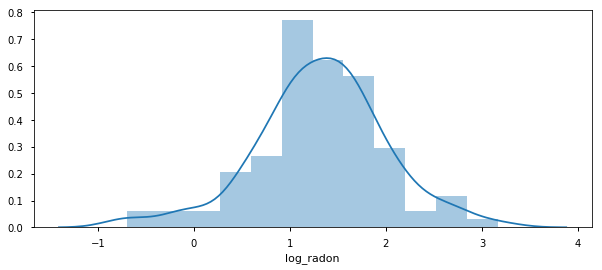

In [14]:
hennepin_radon = radon.query('county=="HENNEPIN"').log_radon
sns.distplot(hennepin_radon)

In [15]:
# this confirms that a pdf is a function of *one* variable
hennepin_radon.shape

(105,)

### Pick the model profile

Recall that the first step in Bayesian inference is specifying a **full probability model** for the problem.

We pick a **Normal distribution**, which is described by its two paramaters $\mu$ (mean) and $\sigma$ (standard deviation):

$$y_i \sim N(\mu, \sigma^2)$$

Note that **Normal** and **Gaussian** is the same thing because Gaussian distributions are the most *normal*!

This implies that we have 2 unknowns in the model; the **mean** and **standard deviation** of the distribution. The ones we pick as initial SWAGs (**S**illy **W**ild-**A**ss **G**uesses) are our *priors*. The funky thing about the priors: We will model them as **probability density functions**, too!

***In other words, the parameters of our pdf model are modelled as pdfs themselves!***

### Choice of priors

How do we choose pdfs for parameters $\mu$ and $\sigma$? 

There are several considerations:

- Discrete vs continuous values
- The support of the variable
- The available prior information

While there may likely be prior information about the distribution of radon values, we will assume ***no prior knowledge*** (about the priors), and specify a **diffuse** prior for each parameter.

Since the mean can take any real value (since it is on the log scale), we will use ***another normal distribution*** here, and specify a *large* variance to allow the possibility of very large or very small values:

$$\mu \sim N(0, 10^2)$$

For the standard deviation, we know that the true value must be positive (no negative variances!). Let's choose a [**uniform**](http://mathworld.wolfram.com/UniformDistribution.html) pdf prior, bounded from below at zero and from above at a value that is sure to be higher than any plausible value the true standard deviation (on the log scale) could take. That way, we are sure to capture the real value, somewhere in -between.

$$\sigma \sim U(0, 10)$$

How did I know to pick these? In one word: *Experience*. It's the same as Machine Learning. There are a lot of points where you have to make good guesses about **hyperparameters**.

We now encode these in a Python model, using the `PyMC3` package.

PyMC3
-----

PyMC3 is a Python library for programming Bayesian analysis; see [here](https://doi.org/10.7717/peerj-cs.55). It's a pretty wonderful package. Looky [here](https://docs.pymc.io/) for its API and docs. It helps us solve tough inverse problems and extract a model from the data.

We will model the radon problem using PyMC3. This type of programming is called ***probabilistic programming***, and it is probabilistic in that we create probability models using programming variables as the model's components. Model components are first-class primitives within the PyMC3 framework. 

>   Another way of thinking about this: unlike a traditional program, which only runs in the forward directions, a probabilistic program is run in both the forward and backward direction. It runs forward to compute consequences of assumptions it contains about the model, but also backward from the data to constrain possible explanations. In practice, many probabilistic programming systems will cleverly interleave forward and backward operations to efficiently home in on the best explanations.  - [Cronin, Beau. "Why Probabilistic Programming Matters." 24 Mar 2013. Google, Online Posting to Google . Web. 24 Mar. 2013]( https://plus.google.com/u/0/107971134877020469960/posts/KpeRdJKR6Z1)

PyMC3 code is easy to read. The only novel thing should be the syntax. Simply remember that we are representing the model's components ($\tau, \lambda_1, \lambda_2$ ) as variables. 

Then execute the following cell. We name our model and define our priors as the pdf's we mentionned above. Notice priors are most often given greek variable names. The parameters for the priors (the parameters for the parameters of our model, also sometimes called *hyperparameters*) were really just silly guesses, and you have to learn to start with good guesses in data science ;-)

In [12]:
from pymc3 import Model, Uniform

with Model() as radon_model:
    μ = Normal('μ', mu=0, sd=10)
    σ = Uniform('σ', 0, 10)

All that remains is to add the **likelihood**, which takes $\mu$ and $\sigma$ as parameters, and the log-radon values as the set of observations:

In [16]:
with radon_model:    
    y = Normal('y', mu=μ, sd=σ, observed=hennepin_radon)

Now, we will fit the model using a numerical approach called [**variational inference**](https://www.cs.jhu.edu/~jason/tutorials/variational.html), which is the default algorithm for PyMC3 (it is a more modern version of the Metropolis algorithm).

In [17]:
from pymc3 import fit

with radon_model:

    samples = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 136.32: 100%|██████████| 10000/10000 [00:05<00:00, 1873.46it/s]
Finished [100%]: Average Loss = 136.28


What we did is fit the best possible analytical gaussian model to the `hennepin_radon` dataset by picking various values of the $\mu$ and $\sigma$ parameters, by varying them across their own probability distributions, which we specified. Actually, PyMC3 did the work, and we watched :-)

Now we're ready to plot our posterior, which is the best possible values for $\mu$ and $\sigma$ that PyMC3 evaluated for us. In other words, the values of $\mu$ and $\sigma$ that result in the best possible $N(\mu, \sigma^2)$.

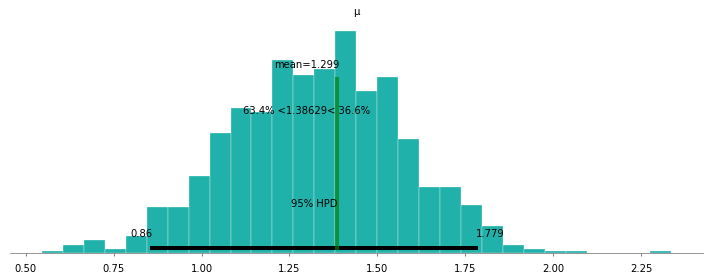

In [18]:
from pymc3 import plot_posterior

plot_posterior(samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');

The plot shows the posterior distribution of $\mu$, along with an estimate of the 95% posterior **credible interval**. 

No questions about the standard deviation, but let's plot it, too:

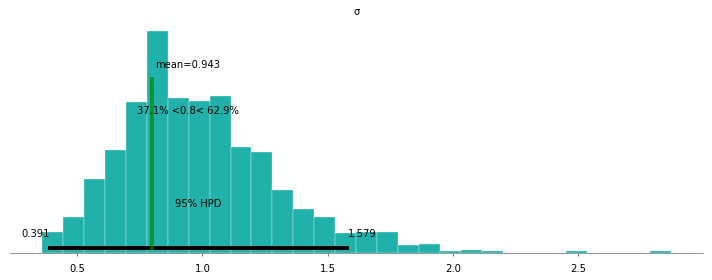

In [19]:
plot_posterior(samples, varnames=['σ'], ref_val=0.8, color='LightSeaGreen');

### Prediction

What is the probability that a given household has a log-radon measurement larger than one? To answer this, we make use of the **posterior predictive distribution**, in its continuous formulation:

$$p(z \;| \; y) = \int_{\theta} p(z \;| \; \theta) p(\theta \; | \; y) d\theta$$

where here $z$ is the predicted value and y is the data used to fit the model.

The posterior predictive distribution accounts for uncertainty about $\theta$. We should refrain from plugging in a single best estimate $\hat{\theta}$ for $\theta$, because it ignores uncertainty about $\theta$, and because a source of uncertainty is ignored, the predicted distribution will be too narrow (extreme values of $\tilde {x}$ will occur more often than the posterior distribution suggests).

The posterior distribution of possible $\theta$ values depends on $\mathbf {X}$: $p(\theta \; | \; \mathbf {X} )$. And the posterior predictive distribution of $\tilde {x}$ given $\mathbf {X}$ is calculated by marginalizing the distribution of $\tilde {x}$ given $\theta$ over the posterior distribution of $\theta$ given $ \mathbf {X}$. That is the integral above. See [here](https://en.wikipedia.org/wiki/Posterior_predictive_distribution) for more explanation.

We can estimate the probability that a given household has a log-radon measurement larger than one from the posterior samples of the parameters in the model:

In [20]:
mus = samples['μ']
sigmas = samples['σ']

In [21]:
radon_samples = Normal.dist(mus, sigmas).random()

In [22]:
(radon_samples > np.log(4)).mean()

0.429

> **Answer*: The posterior probability that a randomly-selected household in Henneprin County contains radon levels in excess of 4 pCi/L is 0.47.

### Model checking

***How do we know our model is any good?***

It's important to check the fit of the model, to see if the underlying assumptions are reasonable. One way to do this is to perform **posterior predictive checks**. This involves generating simulated data using the model that you built, and comparing that data to the observed data.

One can choose a particular statistic to compare, such as tail probabilities or quartiles, but here it is useful to compare them graphically.

We already have these simulations from our `sns.distplot` example.

D:\Anaconda3.5.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


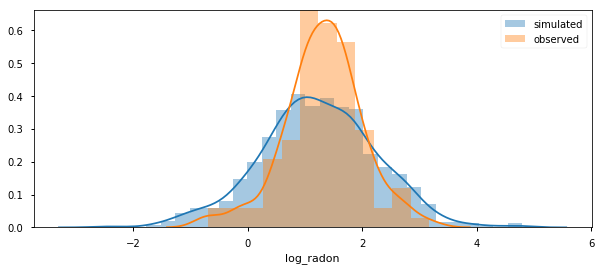

In [23]:
sns.distplot(radon_samples, label='simulated')
sns.distplot(hennepin_radon, label='observed')
plt.legend()

### Prior sensitivity

It is also important to check the sensitivity of your choice of priors to the resulting inference. What if we had guessed completely different hyperparameters?

Here's the same model, with drastically different (though still uninformative) priors:

In [24]:
from pymc3 import Flat, HalfCauchy

with Model() as prior_sensitivity:
    
    μ = Flat('μ')
    σ = HalfCauchy('σ', 5)
    
    dist = Normal('dist', mu=μ, sd=σ, observed=hennepin_radon)
    
    sensitivity_samples = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 123.98: 100%|██████████| 10000/10000 [00:05<00:00, 1909.49it/s]
Finished [100%]: Average Loss = 123.94


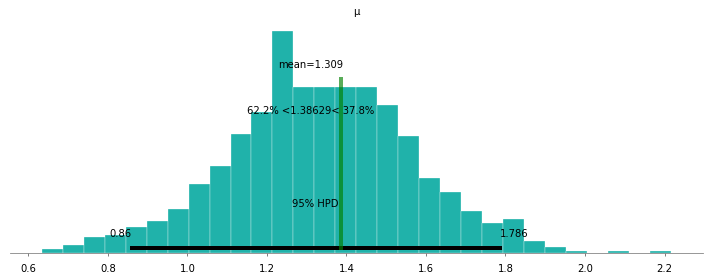

In [25]:
plot_posterior(sensitivity_samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');

Here is the original model for comparison:

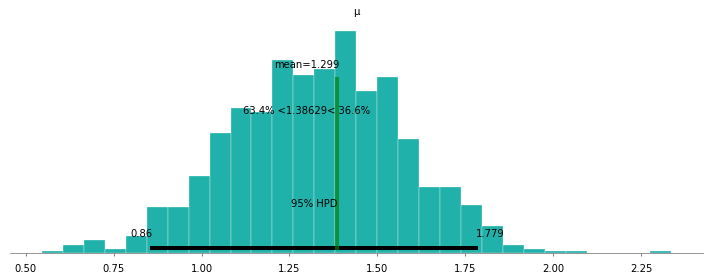

In [26]:
plot_posterior(samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');

*Not much difference* gives us a degree of confidence that our results are good :-)

## Conclusion

The most difficult part of Bayesian estimation is the part that models the parameters of the pdf you picked as your model as pdfs themselves. You might think that it's picking the right statistical profile that matches the histogram of the dataset, but that's usually not that hard. Picking the shape of the pdf for each model parameter is harder because you don't have a physical profile to match! And then, you also need to pick initial conditions for these parameters. 

Machine Learning is similar to Bayesian estimation in that you need to guess a lot of hyperparameters for the machine model (this is why yours truly loves Random forests because there are so few associated hyperparameters). Most ML algorithms however won't yield estimations of the guessing error, which Bayesian estimation methods ***do*** yield. And that becomes very important when a machine tells you to do something ***scary***. *Ummm... are you sure you want me to accelerate to 120 mph? What's the statistical error in your prediction?* 